

# Project: Investigate a Dataset (TMDB movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

> This dataset was taken from The Movie Database (TMDb), "a community built movie and TV datavase". Each row corresponds to a movie and includes a range of data about each film. My focus in this workbook is to find out interesting highlights and and how different fields impact the revenue a particular film has earned. 

## Potential questions
> 1. What are the details of the movie which has the highest and lowest revenue?
> 2. What are popular genres across the years and how has it changed?
> 3. What is the relation between movie runtime and revenue that it has generated?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import csv
import os
import pprint
from datetime import datetime
from pprint import pprint

In [2]:
os.chdir("C:\\Users\\skhemka013\\Documents\\Udacity\\Data Analytics\\Project 2\\Raw data")

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [4]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [5]:
#Check for the values in cast column.
df.cast[0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [6]:
df.shape

(10866, 21)

In [7]:
#datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
#fill no values avaiable with the mean value 
df.fillna(df.mean(),inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
sum(df.duplicated())

1

In [12]:
#drop the duplicate rows
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [13]:
df.shape

(10865, 21)


### Data Cleaning
> We will remove the extra values and the rows associated with it, to produce a high quality subset of predictors and target variables


In [14]:
#Remove outliers = values above upperfence

budget_Q1 = df['budget'].quantile(0.25)
budget_Q3 = df['budget'].quantile(0.75)
budget_IQR = budget_Q3 - budget_Q1
budget_upperfence=budget_Q3+1.5*budget_IQR
print(budget_upperfence)

popularity_Q1 = df['popularity'].quantile(0.25)
popularity_Q3 = df['popularity'].quantile(0.75)
popularity_IQR = popularity_Q3 - popularity_Q1
popularity_upperfence=popularity_Q3+1.5*popularity_IQR
print(popularity_upperfence)

revenue_Q1 = df['revenue'].quantile(0.25)
revenue_Q3 = df['revenue'].quantile(0.75)
revenue_IQR = revenue_Q3 - revenue_Q1
revenue_upperfence=budget_Q3+1.5*revenue_IQR
print(revenue_upperfence)

runtime_Q1 = df['runtime'].quantile(0.25)
runtime_Q3 = df['runtime'].quantile(0.75)
runtime_IQR = runtime_Q3 - runtime_Q1
runtime_upperfence = runtime_Q3+1.5*runtime_IQR
print(runtime_upperfence)

vote_count_Q1 = df['vote_count'].quantile(0.25)
vote_count_Q3 = df['vote_count'].quantile(0.75)
vote_count_IQR = vote_count_Q3 - vote_count_Q1
vote_count_upperfence=vote_count_Q3+1.5*vote_count_IQR
print(vote_count_upperfence)




df.drop(df[ df['budget'] > budget_upperfence ].index , inplace=True)
df.drop(df[ df['popularity'] > popularity_upperfence ].index , inplace=True)
df.drop(df[ df['revenue'] > revenue_upperfence ].index , inplace=True)
df.drop(df[ df['runtime'] > runtime_upperfence ].index , inplace=True)
df.drop(df[ df['vote_count'] > vote_count_upperfence ].index , inplace=True)


37500000.0
1.47328
51000000.0
142.5
339.5


In [15]:
print(df[ (df['budget'] > budget_upperfence) & (df['popularity'] > popularity_upperfence) &
          (df['revenue'] > revenue_upperfence) & (df['runtime'] > runtime_upperfence) & 
          (df['vote_count'] > vote_count_upperfence)])

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

[0 rows x 21 columns]


In [16]:
#After dropping budget outliers

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7992 entries, 109 to 10865
Data columns (total 21 columns):
id                      7992 non-null int64
imdb_id                 7983 non-null object
popularity              7992 non-null float64
budget                  7992 non-null int64
revenue                 7992 non-null int64
original_title          7992 non-null object
cast                    7917 non-null object
homepage                1781 non-null object
director                7953 non-null object
tagline                 5415 non-null object
keywords                6619 non-null object
overview                7988 non-null object
runtime                 7992 non-null int64
genres                  7970 non-null object
production_companies    7035 non-null object
release_date            7992 non-null object
vote_count              7992 non-null int64
vote_average            7992 non-null float64
release_year            7992 non-null int64
budget_adj              7992 non-null f

(7992, 21)

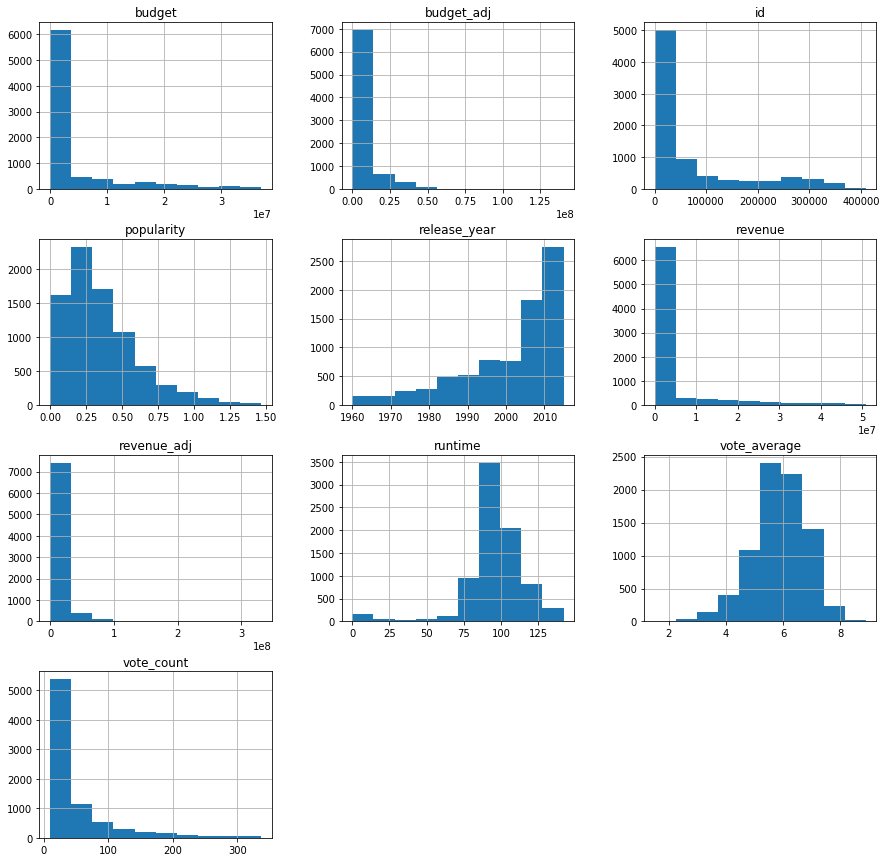

In [17]:
#See charts of the values of each column
df.hist(figsize= (15,15));

In [18]:
#drop values that are 0

print(df.count())



df.drop(df[df['revenue_adj'] == 0].index, inplace=True)

df.drop(df[df['revenue'] == 0].index, inplace=True)

df.drop(df[df['budget_adj'] == 0].index, inplace=True)

df.drop(df[df['budget'] == 0].index, inplace=True)

df.drop(df[df['runtime'] == 0].index, inplace=True)



id                      7992
imdb_id                 7983
popularity              7992
budget                  7992
revenue                 7992
original_title          7992
cast                    7917
homepage                1781
director                7953
tagline                 5415
keywords                6619
overview                7988
runtime                 7992
genres                  7970
production_companies    7035
release_date            7992
vote_count              7992
vote_average            7992
release_year            7992
budget_adj              7992
revenue_adj             7992
dtype: int64


In [19]:
#print(df['homepage']['homepage_exists'])
df.shape

(1501, 21)

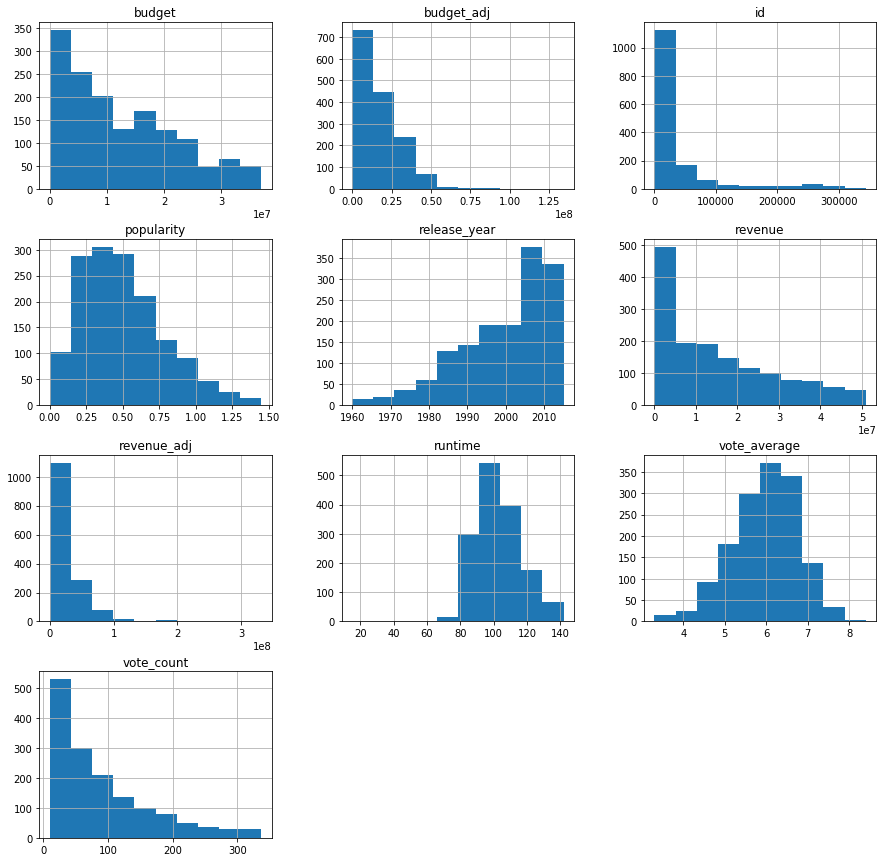

In [20]:
#rerun the charts of each column to see the difference
df.hist(figsize= (15,15));

In [21]:
#split columns with values in pipe into different columns

df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

In [22]:
df_c.head()


cast_1          cast_2               cast_3  \
109  Jeffrey Dean Morgan  Robert De Niro        Kate Bosworth   
111      Charlize Theron  Nicholas Hoult  Christina Hendricks   
126       Bryan Cranston      Diane Lane         Helen Mirren   
127     Chiwetel Ejiofor   Nicole Kidman        Julia Roberts   
131  Thomas Haden Church    Josh Wiggins        Lauren Graham   

                  cast_4        cast_5  
109        Dave Bautista   Gina Carano  
111  ChloÃ« Grace Moretz  Tye Sheridan  
126         Elle Fanning    Louis C.K.  
127          Dean Norris  Lyndon Smith  
131         Robbie Amell   Mia Xitlali

In [23]:
#Join the new columns into the original dataframe

df = df.join([df_c, df_d, df_k, df_g, df_p])

In [24]:
df.head()

id    imdb_id  popularity    budget   revenue        original_title  \
109  336004  tt3276924    1.449072   8900000     50136                 Heist   
111  182560  tt2402101    1.443406  20000000    208588           Dark Places   
126  294016  tt3203606    1.316239  15000000   8235661                Trumbo   
127  290751  tt1741273    1.315266  19500000  32189727  Secret in Their Eyes   
131  272878  tt3369806    1.278928  20000000  43967255                   Max   

                                                  cast  \
109  Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...   
111  Charlize Theron|Nicholas Hoult|Christina Hendr...   
126  Bryan Cranston|Diane Lane|Helen Mirren|Elle Fa...   
127  Chiwetel Ejiofor|Nicole Kidman|Julia Roberts|D...   
131  Thomas Haden Church|Josh Wiggins|Lauren Graham...   

                            homepage               director  \
109                              NaN             Scott Mann   
111      http://darkplacesmovie.com/  Gilles Paquet-Brenner   
126                              NaN              Jay Roach   
127  http://secretintheireyes.movie/              Billy Ray   
131                              NaN             Boaz Yakin   

                                               tagline  ...   genres_1  \
109         Never make a bet you can't afford to lose.  ...      Crime   
111  In 1985, her entire family was murdered. 30 ye...  ...      Drama   
126               Are you now or have you ever been...  ...      Drama   
127                                    Don't look back  ...      Crime   
131                         Best Friend. Hero. Marine.  ...  Adventure   

    genres_2  genres_3 genres_4 genres_5          production_companies_1  \
109   Action  Thriller     None     None              Emmett/Furla Films   
111  Mystery  Thriller     None     None  Denver and Delilah Productions   
126     None      None     None     None         Groundswell Productions   
127    Drama   Mystery     None     None                 Ingenious Media   
131    Drama    Family     None     None          Sunswept Entertainment   

     production_companies_2       production_companies_3  \
109      Silver Plane Films  Mass Hysteria Entertainment   
111         Mandalay Vision        Exclusive Media Group   
126     Inimitable Pictures            ShivHans Pictures   
127    Gran Via Productions                    IM Global   
131            Warner Bros.    Metro-Goldwyn-Mayer (MGM)   

     production_companies_4  production_companies_5  
109     Tri Vision Pictures                    None  
111        Hugo Productions       Cuatro Plus Films  
126                    None                    None  
127         Route One Films                    None  
131                    None                    None  

[5 rows x 52 columns]

In [25]:
#remove the columns as the new columns are already present in the dataframe
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies'], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 109 to 10848
Data columns (total 47 columns):
id                        1501 non-null int64
imdb_id                   1501 non-null object
popularity                1501 non-null float64
budget                    1501 non-null int64
revenue                   1501 non-null int64
original_title            1501 non-null object
homepage                  399 non-null object
tagline                   1313 non-null object
overview                  1501 non-null object
runtime                   1501 non-null int64
release_date              1501 non-null object
vote_count                1501 non-null int64
vote_average              1501 non-null float64
release_year              1501 non-null int64
budget_adj                1501 non-null float64
revenue_adj               1501 non-null float64
cast_1                    1497 non-null object
cast_2                    1494 non-null object
cast_3                    1494 non-null object


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1. What are the details of the movie which has the highest and lowest revenue?

In [27]:
import pprint
#defining the function
def minmax(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
minmax('revenue')

2985  \
id                                                                  14359   
imdb_id                                                         tt0918927   
popularity                                                       0.743689   
budget                                                           20000000   
revenue                                                          50907234   
original_title                                                      Doubt   
homepage                                                              NaN   
tagline                 There is no evidence. There are no witnesses. ...   
overview                In 1964, a Catholic school nun questions a pri...   
runtime                                                               104   
release_date                                                     11/27/08   
vote_count                                                            197   
vote_average                                                          6.7   
release_year                                                         2008   
budget_adj                                                    2.02557e+07   
revenue_adj                                                   5.15582e+07   
cast_1                                                          Amy Adams   
cast_2                                             Philip Seymour Hoffman   
cast_3                                                       Meryl Streep   
cast_4                                                        Viola Davis   
cast_5                                                     Alice Drummond   
director_1                                           John Patrick Shanley   
director_2                                                           None   
director_3                                                           None   
director_4                                                           None   
director_5                                                           None   
director_6                                                           None   
director_7                                                           None   
director_8                                                           None   
director_9                                                           None   
director_10                                                          None   
director_11                                                          None   
keywords_1                                                   sexual abuse   
keywords_2                                                            boy   
keywords_3                                                           wine   
keywords_4                                                           gift   
keywords_5                                                        janitor   
genres_1                                                            Drama   
genres_2                                                          Mystery   
genres_3                                                             None   
genres_4                                                             None   
genres_5                                                             None   
production_companies_1                                      Miramax Films   
production_companies_2                                               None   
production_companies_3                                               None   
production_companies_4                                               None   
production_companies_5                                               None   

                                                                     5067  
id                                                                  13537  
imdb_id                                                         tt0323944  
popularity                                                       0.462609  
budget                                                            60

> Inference: In our current dataset Doubt is the move that has earned the highest revenue. This makes sense as it had a wonderful cast and a great director associated with the movie. THe movie released it 2008 and was a huge commercial success.



### Research Question 2.  What are popular genres across the years and how has it changed?

In [28]:
df_genres = df.loc[:,'genres_1': 'genres_5'].join(df['release_year'])
df_genres

genres_1         genres_2  genres_3 genres_4 genres_5  release_year
109        Crime           Action  Thriller     None     None          2015
111        Drama          Mystery  Thriller     None     None          2015
126        Drama             None      None     None     None          2015
127        Crime            Drama   Mystery     None     None          2015
131    Adventure            Drama    Family     None     None          2015
...          ...              ...       ...      ...      ...           ...
10793  Adventure        Animation     Drama     None     None          1978
10822      Drama             None      None     None     None          1966
10828    Mystery         Thriller      None     None     None          1966
10829     Action          Western      None     None     None          1966
10848  Adventure  Science Fiction      None     None     None          1966

[1501 rows x 6 columns]

In [29]:
#make new dataframes of popular genres by year
df_2015 = df_genres[df_genres['release_year']==2015]
df_2010 = df_genres[df_genres['release_year']==2010]
df_2005 = df_genres[df_genres['release_year']==2005]
df_2000 = df_genres[df_genres['release_year']==2000]

In [41]:

#remove the release year column as you don't need it anymore
df_2015.drop('release_year',axis=1, inplace=True)
df_2010.drop('release_year',axis=1, inplace=True)
df_2005.drop('release_year',axis=1, inplace=True)
df_2000.drop('release_year',axis=1, inplace=True)

In [31]:
#example output of the new dataframes
df_2000

genres_1   genres_2         genres_3         genres_4 genres_5
8685      Crime      Drama         Thriller             None     None
8695      Drama      Crime            Music             None     None
8698     Horror      Drama         Thriller          Mystery     None
8705      Crime      Drama         Thriller             None     None
8743  Animation     Family             None             None     None
8745     Horror   Thriller             None             None     None
8746      Crime      Drama          Mystery             None     None
8749     Horror       None             None             None     None
8757     Comedy      Drama          Romance             None     None
8762     Comedy       None             None             None     None
8769      Drama    Romance             None             None     None
8776      Drama     Comedy          Romance             None     None
8781     Action    Fantasy  Science Fiction             None     None
8782     Action     Comedy            Drama          Romance     None
8788      Drama    Mystery         Thriller             None     None
8789      Drama       None             None             None     None
8791     Comedy      Drama             None             None     None
8793     Action  Adventure          Fantasy  Science Fiction     None
8795     Comedy       None             None             None     None
8797      Drama       None             None             None     None
8798    Mystery   Thriller             None             None     None
8799     Action     Comedy            Drama             None     None
8801      Drama      Music             None             None     None
8804    Romance     Comedy            Drama             None     None
8808      Crime     Comedy             None             None     None
8809     Comedy      Drama          Romance             None     None
8815     Comedy      Crime          Mystery             None     None
8817     Action     Comedy          Romance         Thriller     None
8860     Horror     Family          Foreign             None     None
8862      Drama     Horror             None             None     None
8868     Comedy      Drama             None             None     None
8883   Thriller       None             None             None     None

In [32]:
#change the df to a stack based format and count the number of iterations in each genre
df_2015= df_2015.stack().value_counts()
df_2010= df_2010.stack().value_counts()
df_2005= df_2005.stack().value_counts()
df_2000= df_2000.stack().value_counts()


In [33]:
df_2015.index.sort_values()
df_2010.index.sort_values()
df_2005.index.sort_values()
df_2000.index.sort_values()

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller'],
      dtype='object')

In [34]:
#print iterations of genres in each year
print(df_2015)
print(df_2010)
print(df_2005)
print(df_2000)

Drama        33
Comedy       14
Thriller      8
Romance       6
Music         5
Adventure     3
Crime         3
Horror        3
War           3
Mystery       3
Fantasy       2
History       2
Animation     1
Family        1
Action        1
dtype: int64
Drama              44
Comedy             30
Thriller           21
Action             15
Romance            12
Horror             10
Crime              10
Science Fiction     5
Mystery             5
Adventure           4
Documentary         4
Fantasy             3
Family              3
Foreign             3
History             2
Animation           2
Music               1
dtype: int64
Drama              40
Comedy             22
Thriller           16
Horror             12
Romance            10
Action              9
Crime               9
Family              6
Adventure           6
Fantasy             5
Mystery             5
Science Fiction     2
Documentary         2
Western             1
Music               1
History             1
Animatio

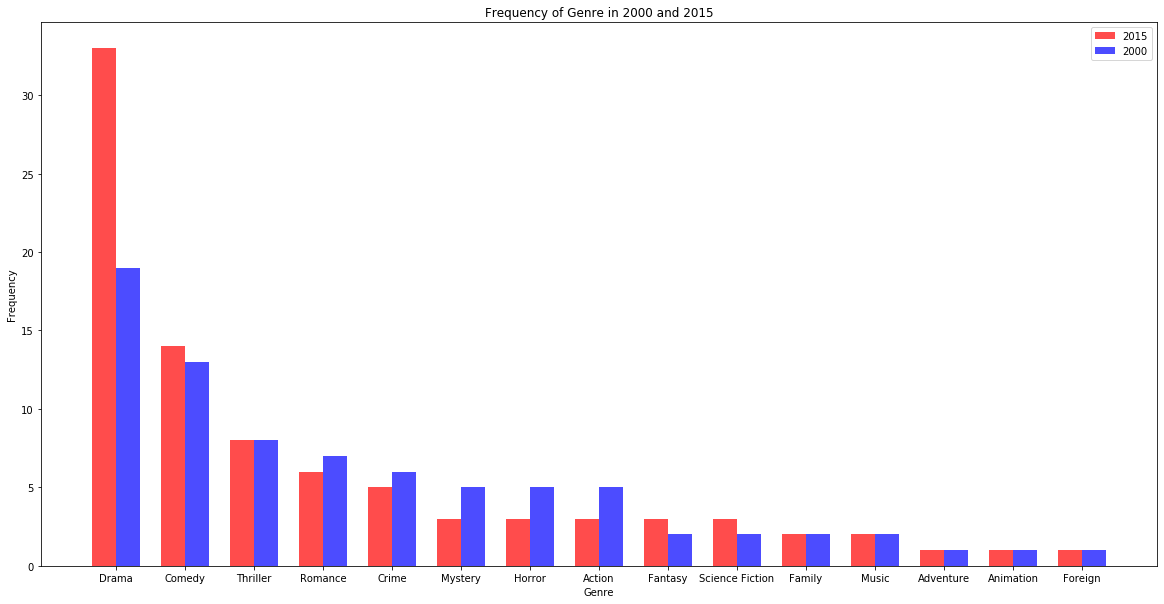

In [38]:
#create a bar chart showing the popularity of different genres in 2015 and 2000.
labels = df_2015
ind = np.arange(len(df_2015))
width=.35
red_bars = plt.bar(ind, df_2015,width, color='r', alpha=.7, label='2015')
white_bars = plt.bar(ind + width, df_2000, width, color='b', alpha=.7, label='2000')
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
labels = df_2000.index
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(ind+width/2, labels)

plt.legend();



> Inference: Movies with Drama genre have really increased by 2015 compared to 2000. The difference in popularity between the different genres hasn't changed for the most part from 2000 to 2015.




### Research Question 3.  What is the relation between movie runtime and revenue that it has generated?

In [36]:

#make a new dataframe with only the revenue and runtime values
df_vote = df.loc[:, ['revenue', 'runtime']]


In [48]:
#plot scatterplot between the runtime of movies and the revenues they earned
df_vote.plot(x='runtime', y='revenue', kind='scatter');
plt.ylabel('Revenue earned by the movie')
plt.xlabel('Runtime of the movie (minutes)')
plt.title('Scatterplot of Runtime vs Revenue generated by a movie')



Text(0.5, 1.0, 'Scatterplot of Runtime vs Revenue generated by a movie')

### Scatterplot of Runtime vs Revenue graph
> Looking at the graph above from our cleaned dataset there were a few genres missing in different years as well. 
2015 has a popular genre - War. 
In previous years to 2015, there was a popular genre - Documentary which does not show up as a popular genre in 2015. 
The popularity of Drama genre has really shot up but otherwise the popularity proportion is similar between 2015 and 2000.

<a id='conclusions'></a>
## Conclusions

> We first started with understanding the importance of each column towards the revenue of the film and looked at the distribution of the individual values of the columns. After cleaning the dataset to produce high quality subset of the original dataset, we find that the movie - Doubt earned the highest revenue with an vote average of 6.7 . This movie had a great cast and was directed by a talented individual. 
We find out the popular genres accross 2 decades and looked at 2000,2005,2010 and 2015. Not only the genres popularity has changed but in our cleaned dataset there were a few genres missing in different years as well. 2015 has a popular genre - War. In previous years to 2015, there was a popular genre - Documentary which does not show up as a popular genre in 2015. 
The popularity of Drama genre has really shot up but otherwise the popularity proportion is similar between 2015 and 2000.

> With the increase of short attention span syndrome in people I found out how the runtimes of movies would be proportional to revenue generated. Not everyone would be able to see a long movie, atleast not watch it with the same interest. 
Majority of the movies are between 80 minutes and 120 minutes. Majority of the revenue of these movies are either low or medium, few movies are high revenue as well. Having said that, there are alot of movies more than 120 minutes long but this section is more distributed in terms of the revenue. Therefore, a Director might just make >120 minutes movies for the people. 

>Limitations: The dataset provided was a subset of the original movie database. In addition to that, alot of values inthe columns were not present and therefore had to be removed or substituted with the mean value. This might lead to a skewness in the results of the conclusion when compared to the original dataset.  
